In [2]:
import pandas as pd 

mises_refs_df = pd.read_csv("../data/mises_refs.csv")

In [3]:
mises_refs_df.head()

,Unnamed: 0.1,Unnamed: 0,paper_id,raw,context,sentence_id,sentence_seq_number,author,page,year,human_action_chapter_by_ref_page,human_action_chapter_number,human_action_chapter_name,human_action_part_number,human_action_part_name
0,0,54393,496,"(Mises [ ] 1958, 1), 1)","The mode of acquiring and studying knowledge, ...",_uYxfp4v,70,Mises,1.0,1958.0,0.0,0.0,Chapter 0: Introduction,1.0,Human Action
1,1,10218,83,"(Mises 2009, 1-2)","By the time he finished his studies, however, ...",_Hj38fKX,117,Mises,1.0,2009.0,0.0,0.0,Chapter 0: Introduction,1.0,Human Action
2,2,13769,113,"Mises (2011, 1-44)","In a world of national fiat currencies, a bala...",_veSeZAM,63,Mises,1.0,2011.0,0.0,0.0,Chapter 0: Introduction,1.0,Human Action
3,3,50557,449,"(Mises 2011, 1","Interventionism, for its part, ""seeks to retai...",_4GTtg6k,352,Mises,1.0,2011.0,0.0,0.0,Chapter 0: Introduction,1.0,Human Action
4,4,54619,496,"Mises's (1962, 1)","Indeed, the logical structure of the human min...",_HqKRYuG,367,Mises,1.0,1962.0,0.0,0.0,Chapter 0: Introduction,1.0,Human Action


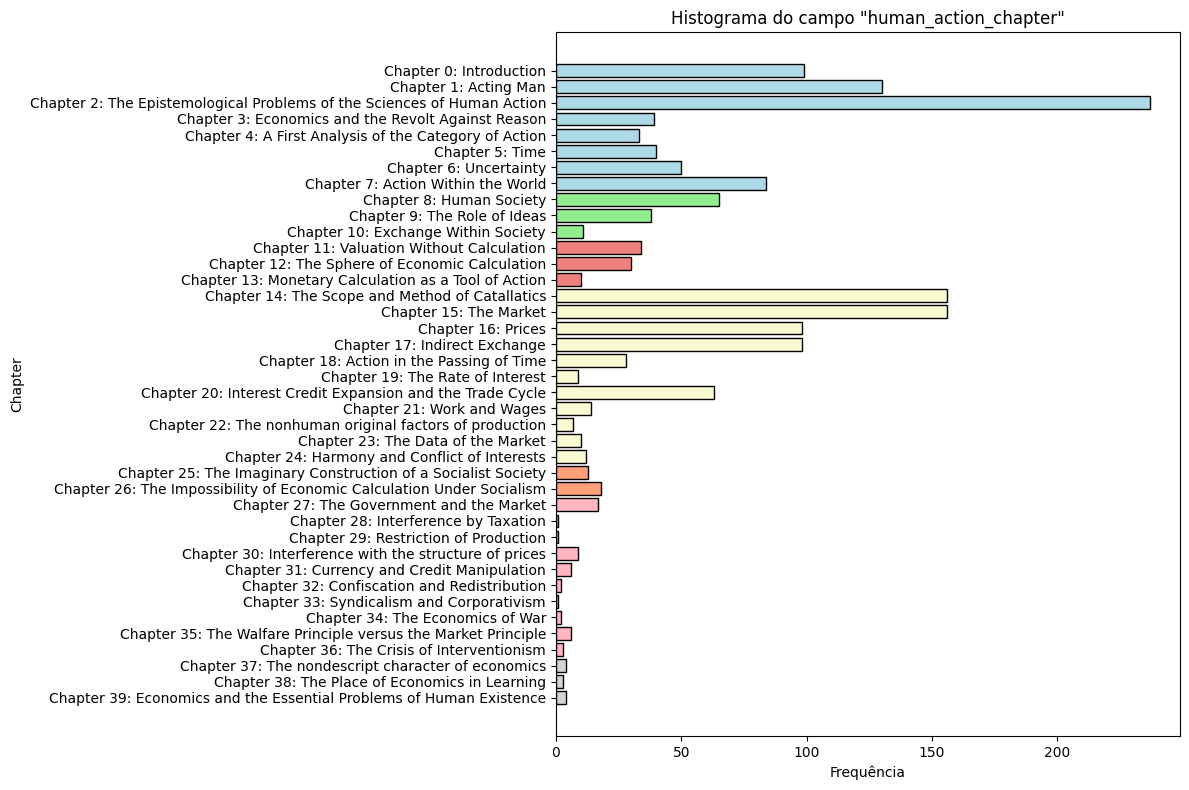

,human_action_chapter_name,human_action_chapter_number,human_action_part_number,bar_color,counts
32,Chapter 39: Economics and the Essential Proble...,39.0,7.0,lightgray,4
31,Chapter 38: The Place of Economics in Learning,38.0,7.0,lightgray,3
30,Chapter 37: The nondescript character of econo...,37.0,7.0,lightgray,4
29,Chapter 36: The Crisis of Interventionism,36.0,6.0,lightpink,3
28,Chapter 35: The Walfare Principle versus the M...,35.0,6.0,lightpink,6
27,Chapter 34: The Economics of War,34.0,6.0,lightpink,2
26,Chapter 33: Syndicalism and Corporativism,33.0,6.0,lightpink,1
25,Chapter 32: Confiscation and Redistribution,32.0,6.0,lightpink,2
24,Chapter 31: Currency and Credit Manipulation,31.0,6.0,lightpink,6
23,Chapter 30: Interference with the structure of...,30.0,6.0,lightpink,9


In [ ]:
import matplotlib.pyplot as plt

# Simulating the DataFrame (example)
# data = {'human_action_chapter': ['Chapter 3', 'Chapter 1', 'not found', 'Chapter 2', 'Chapter 11', 'Chapter 1', 'not found']}
# mises_refs_df = pd.DataFrame(data)

# Drop rows where 'human_action_chapter' is "not found"
filtered_df = mises_refs_df[mises_refs_df['human_action_chapter_name'] != 'not found']

# Color mapping based on parts
part_colors = {
    1: 'lightblue',
    2: 'lightgreen',
    3: 'lightcoral',
    4: 'lightgoldenrodyellow',
    5: 'lightsalmon',
    6: 'lightpink',
    7: 'lightgray'
}


# Assign colors to each chapter based on its part
filtered_df['bar_color'] = filtered_df['human_action_part_number'].map(part_colors)

# Group by chapter and count occurrences, then sort by chapter number
chapter_counts_sorted = (
    filtered_df.groupby(['human_action_chapter_name', 'human_action_chapter_number', 'human_action_part_number', 'bar_color']).size().reset_index(name='counts')
    .sort_values(by='human_action_chapter_number', ascending=False)
)

# Plot the histogram with adjusted vertical space
plt.figure(figsize=(12, 8))  # Increased height for more vertical space
plt.barh(chapter_counts_sorted['human_action_chapter_name'], chapter_counts_sorted['counts'], 
         color=chapter_counts_sorted['bar_color'], edgecolor='black')

plt.title('Histograma do campo "human_action_chapter"')
plt.xlabel('Frequência')
plt.ylabel('Chapter')

# Adjust layout for better label display
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../data/figures/human_action_chapters.png')

# Show the plot
plt.show()


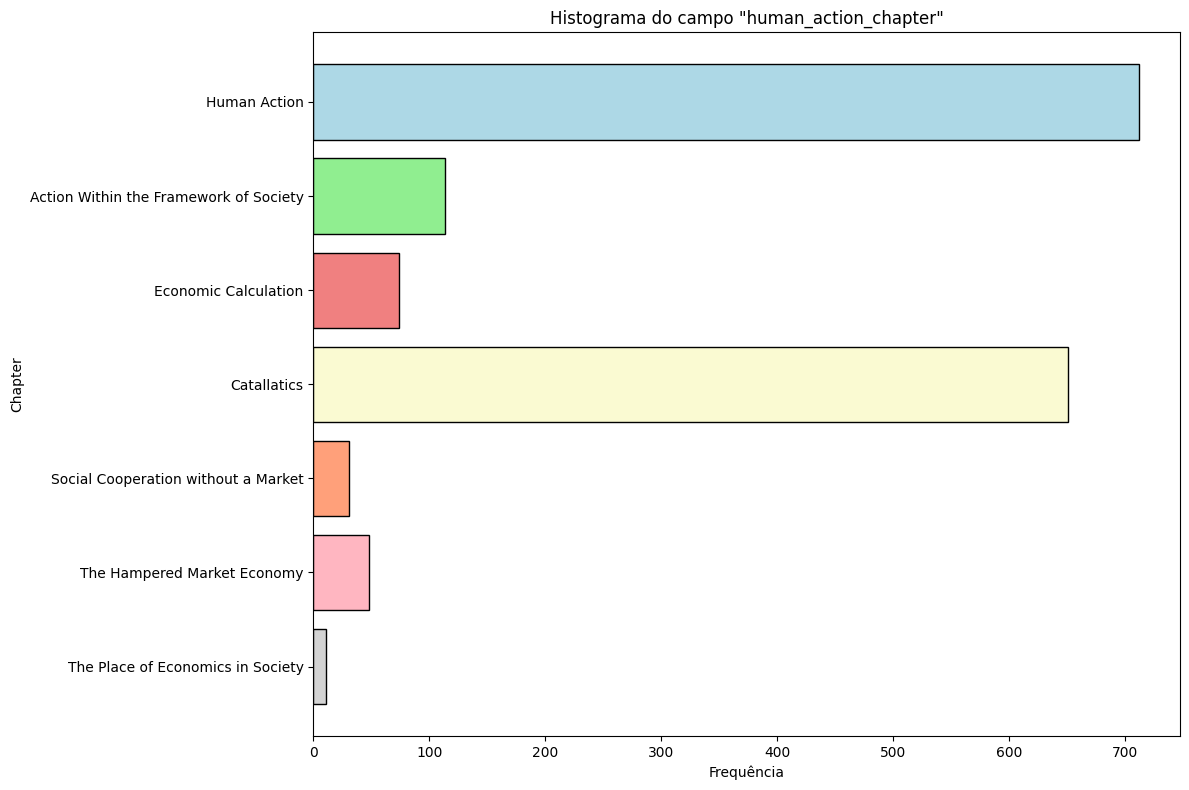

In [ ]:
import matplotlib.pyplot as plt

# Simulating the DataFrame (example)
# data = {'human_action_chapter': ['Chapter 3', 'Chapter 1', 'not found', 'Chapter 2', 'Chapter 11', 'Chapter 1', 'not found']}
# mises_refs_df = pd.DataFrame(data)

# Drop rows where 'human_action_chapter' is "not found"
filtered_df = mises_refs_df[mises_refs_df['human_action_chapter_name'] != 'not found']

# Color mapping based on parts
part_colors = {
    1: 'lightblue',
    2: 'lightgreen',
    3: 'lightcoral',
    4: 'lightgoldenrodyellow',
    5: 'lightsalmon',
    6: 'lightpink',
    7: 'lightgray'
}


# Assign colors to each chapter based on its part
filtered_df['bar_color'] = filtered_df['human_action_part_number'].map(part_colors)

# Group by chapter and count occurrences, then sort by chapter number
chapter_counts_sorted = (
    filtered_df.groupby(['human_action_part_name', 'human_action_part_number', 'bar_color']).size().reset_index(name='counts')
    .sort_values(by='human_action_part_number', ascending=False)
)

# Plot the histogram with adjusted vertical space
plt.figure(figsize=(12, 8))  # Increased height for more vertical space
plt.barh(chapter_counts_sorted['human_action_part_name'], chapter_counts_sorted['counts'], 
         color=chapter_counts_sorted['bar_color'], edgecolor='black')

plt.title('Histograma do campo "human_action_chapter"')
plt.xlabel('Frequência')
plt.ylabel('Chapter')

# Adjust layout for better label display
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../data/figures/human_action_parts.png')

# Show the plot
plt.show()
